In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import timeit as tm

In [2]:
tankCapacity = 20
milesPerGallon = 20

tankLevel = tankCapacity
maxReachableDistance = tankCapacity * milesPerGallon

start = 1
end = 20

minPrice = 1.5
maxPrice = 5.0

minReachableStations = 1
maxReachableStations = 5

minDistance = 5
maxDistance = 100

<h2>Create stations with prices between minPrice and maxPrice, connected by distances between 5 and maxDistance miles</h2>

In [3]:
def generateRandomOpenRouteGraph(trace = False):
    G = nx.DiGraph()
    G.add_node(start, price = 0)

    # Add nodes with prices normally distributed with mean $4.75 and standard deviation of $0.20
    prices = np.random.normal(4.75, 0.20, 19)
    for i in range(start + 1, end + 1):
        G.add_node(i, price=prices[i - 2])
    
    for currStation in range(start, end):
        numReachableStations = rd.randint(minReachableStations, maxReachableStations)
        if (trace):
            print('Station',currStation,'is connected to',numReachableStations,'stations')
    
        # Reset minDistance and maxDistance for every currStation
        minDistance = 5
        maxDistance = 100
    
        # Get a random distance from currStation to the next 1-5 stations
        for i in range(1, numReachableStations + 1):
            if (trace):
                print('Current edge: (',currStation,',',(currStation + i),')')
            if (currStation + i) <= end:
                # Distance from k to (k + i) must be greater than from k to (k + i - 1) for all stations k
                if G.has_edge(currStation, currStation + i - 1):
                    if (trace):
                        print('Distance from station',currStation,'to',currStation + i,'must be greater than from station', currStation,'to',currStation + i - 1)
                    newMinDistance = G[currStation][currStation + i - 1]['distance'] + 1
                    maxDistance = min(maxReachableDistance, maxDistance + (newMinDistance - minDistance))
                    minDistance = newMinDistance

                # Distance from k to (k + i) must be less than [(k - 1) to k] + [(k - 1) to (k + i)] for all stations k
                if G.has_edge(currStation - 1, currStation) and G.has_edge(currStation - 1, currStation + i):
                    if (trace):
                        print('Distance from stations',currStation,'to',currStation + i,'must be less than ( station',currStation - 1,'to',currStation,') + ( station',currStation - 1,'to',currStation + i,')')
                    maxDistance = min(maxDistance, maxReachableDistance, G[currStation - 1][currStation]['distance'] + G[currStation - 1][currStation + i]['distance'] - 1)
                
                # If minDistance meets or exceeds the ceiling of maxDistance...
                if (minDistance >= maxDistance):
                    if (i > 1): # As long as the current station is connected to at least one station, the graph is still valid
                        break
                    else:
                        return -1 # Else return err
                
                if (trace):
                    print('minDistance =',minDistance)
                    print('maxDistance =',maxDistance)

                # Add corresponding edge to G, with distances to the stations
                d = rd.randint(minDistance,maxDistance)
                G.add_edge(currStation, currStation + i, distance=d)
                if (trace):
                    print('')
            else:
                if (trace):
                    print('break')
                    print('')
                break # Stop if the last station is reached
    
    return G

In [4]:
Stations = generateRandomOpenRouteGraph(True)

Station 1 is connected to 2 stations
Current edge: ( 1 , 2 )
minDistance = 5
maxDistance = 100

Current edge: ( 1 , 3 )
Distance from station 1 to 3 must be greater than from station 1 to 2
minDistance = 94
maxDistance = 189

Station 2 is connected to 5 stations
Current edge: ( 2 , 3 )
Distance from stations 2 to 3 must be less than ( station 1 to 2 ) + ( station 1 to 3 )
minDistance = 5
maxDistance = 100

Current edge: ( 2 , 4 )
Distance from station 2 to 4 must be greater than from station 2 to 3
minDistance = 85
maxDistance = 180

Current edge: ( 2 , 5 )
Distance from station 2 to 5 must be greater than from station 2 to 4
minDistance = 148
maxDistance = 243

Current edge: ( 2 , 6 )
Distance from station 2 to 6 must be greater than from station 2 to 5
minDistance = 235
maxDistance = 330

Current edge: ( 2 , 7 )
Distance from station 2 to 7 must be greater than from station 2 to 6
minDistance = 319
maxDistance = 400

Station 3 is connected to 4 stations
Current edge: ( 3 , 4 )
Distan

In [5]:
Stations.nodes.data()

NodeDataView({1: {'price': 0}, 2: {'price': 4.511544517897631}, 3: {'price': 5.012874005718568}, 4: {'price': 4.9187027118284155}, 5: {'price': 4.969589468616692}, 6: {'price': 4.932024543609508}, 7: {'price': 4.712750783169803}, 8: {'price': 4.963622247271697}, 9: {'price': 4.762025291146745}, 10: {'price': 4.799497719002466}, 11: {'price': 5.08737327718581}, 12: {'price': 4.801533403555902}, 13: {'price': 4.84997295603812}, 14: {'price': 4.7055844983957495}, 15: {'price': 4.749203531933545}, 16: {'price': 4.623073717284326}, 17: {'price': 4.548785494039404}, 18: {'price': 4.949674131119877}, 19: {'price': 4.708742136002485}, 20: {'price': 4.8945977084353665}})

In [6]:
Stations.edges()

OutEdgeView([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (10, 11), (11, 12), (12, 13), (12, 14), (12, 15), (12, 16), (13, 14), (13, 15), (13, 16), (14, 15), (15, 16), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (17, 20), (18, 19), (18, 20), (19, 20)])

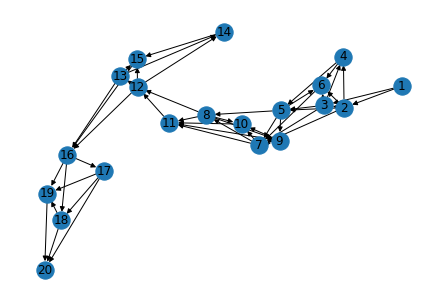

In [7]:
nx.draw(Stations, with_labels=True)

In [8]:
Stations.edges.data()

OutEdgeDataView([(1, 2, {'distance': 93}), (1, 3, {'distance': 123}), (2, 3, {'distance': 84}), (2, 4, {'distance': 147}), (2, 5, {'distance': 234}), (2, 6, {'distance': 318}), (2, 7, {'distance': 354}), (3, 4, {'distance': 36}), (3, 5, {'distance': 117}), (3, 6, {'distance': 148}), (3, 7, {'distance': 202}), (4, 5, {'distance': 11}), (4, 6, {'distance': 85}), (5, 6, {'distance': 90}), (5, 7, {'distance': 97}), (5, 8, {'distance': 187}), (5, 9, {'distance': 248}), (6, 7, {'distance': 81}), (7, 8, {'distance': 83}), (7, 9, {'distance': 140}), (7, 10, {'distance': 215}), (7, 11, {'distance': 244}), (8, 9, {'distance': 84}), (8, 10, {'distance': 114}), (8, 11, {'distance': 121}), (8, 12, {'distance': 178}), (9, 10, {'distance': 64}), (9, 11, {'distance': 132}), (10, 11, {'distance': 94}), (11, 12, {'distance': 95}), (12, 13, {'distance': 11}), (12, 14, {'distance': 78}), (12, 15, {'distance': 129}), (12, 16, {'distance': 196}), (13, 14, {'distance': 54}), (13, 15, {'distance': 61}), (13, 

In [9]:
Stations.number_of_edges()

48

<h2>Agacency matrix for G</h2>

In [10]:
def getAdjacencyMatrix(Route, trace = False):
    M = []
    for i in range(start, end + 1):
        row = []
        # Initialize the adjacency matrix by assuming the shortest path between two stations is the length of the edge
        #  between them, and that no path exists if there is no edge directly connecting them
        for j in range(start, end + 1):
            if j == i:
                row.append(0)
            elif j <= i or not Route.has_edge(i,j):
                row.append(np.inf)
            else:
                row.append(Route[i][j]['distance'])
        M.append(row)
        if (trace):
            print(i,'\t:',row)
    return M

In [11]:
routeAdjacencyMatrix = getAdjacencyMatrix(Stations, True)

1 	: [0, 93, 123, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
2 	: [inf, 0, 84, 147, 234, 318, 354, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
3 	: [inf, inf, 0, 36, 117, 148, 202, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
4 	: [inf, inf, inf, 0, 11, 85, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
5 	: [inf, inf, inf, inf, 0, 90, 97, 187, 248, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
6 	: [inf, inf, inf, inf, inf, 0, 81, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
7 	: [inf, inf, inf, inf, inf, inf, 0, 83, 140, 215, 244, inf, inf, inf, inf, inf, inf, inf, inf, inf]
8 	: [inf, inf, inf, inf, inf, inf, inf, 0, 84, 114, 121, 178, inf, inf, inf, inf, inf, inf, inf, inf]
9 	: [inf, inf, inf, inf, inf, inf, inf, inf, 0, 64, 132, inf, inf, inf, inf, inf, inf, inf, inf, inf]
10 	: [inf, inf, inf, inf, inf, inf, inf, inf, inf, 0, 94, inf, inf, inf, i

In [12]:
def getShortestDistanceAndNextNodeMatrices(adjMatrix, nextNodeMatrix, trace = False):
    S = []
    for i in range(end):
        sRow = []
        nRow = []
        
        for j in range(end):
            # Initialize the shortest distance matrix as a copy of the base adjacency matrix
            sRow.append(adjMatrix[i][j])
            
            # Initialize the next node matrix by assuming that it is always best to go directly to the destination from 
            #  the starting station (as opposed to visiting a station between them), and that no path exists 
            #  between stations if there is no edge directly between them
            if 0 < adjMatrix[i][j] < maxReachableDistance:
                nRow.append(j+1)
            else:
                nRow.append(-1)
        S.append(sRow)
        nextNodeMatrix.append(nRow)
    
    # Iteratively improve the shortest distance and next node matrices by finding the station k that 
    #  lies between two stations i and j that minimizes the distance of the path from i to j
    for k in range(end):
        for l in range(end):
            for m in range(end):
                if (S[l][m] > S[l][k] + S[k][m]):
                    S[l][m] = S[l][k] + S[k][m]
                    nextNodeMatrix[l][m] = nextNodeMatrix[l][k]
    
    if (trace):
        for s in range(end):
            print(s+1,'\t:',S[s])
    
    return S

In [13]:
nextNodeMatrix = []
shortestDistanceMatrix = getShortestDistanceAndNextNodeMatrices(routeAdjacencyMatrix, nextNodeMatrix, True)
print('')
for n in range(end):
    print(n+1,'\t:',nextNodeMatrix[n])

1 	: [0, 93, 123, 159, 170, 244, 267, 350, 407, 464, 471, 528, 539, 593, 600, 639, 691, 716, 735, 789]
2 	: [inf, 0, 84, 120, 131, 205, 228, 311, 368, 425, 432, 489, 500, 554, 561, 600, 652, 677, 696, 750]
3 	: [inf, inf, 0, 36, 47, 121, 144, 227, 284, 341, 348, 405, 416, 470, 477, 516, 568, 593, 612, 666]
4 	: [inf, inf, inf, 0, 11, 85, 108, 191, 248, 305, 312, 369, 380, 434, 441, 480, 532, 557, 576, 630]
5 	: [inf, inf, inf, inf, 0, 90, 97, 180, 237, 294, 301, 358, 369, 423, 430, 469, 521, 546, 565, 619]
6 	: [inf, inf, inf, inf, inf, 0, 81, 164, 221, 278, 285, 342, 353, 407, 414, 453, 505, 530, 549, 603]
7 	: [inf, inf, inf, inf, inf, inf, 0, 83, 140, 197, 204, 261, 272, 326, 333, 372, 424, 449, 468, 522]
8 	: [inf, inf, inf, inf, inf, inf, inf, 0, 84, 114, 121, 178, 189, 243, 250, 289, 341, 366, 385, 439]
9 	: [inf, inf, inf, inf, inf, inf, inf, inf, 0, 64, 132, 227, 238, 292, 299, 338, 390, 415, 434, 488]
10 	: [inf, inf, inf, inf, inf, inf, inf, inf, inf, 0, 94, 189, 200, 254, 26

<h2>Optimal solution</h2>
<h3>Control</h3>

In [14]:
def Cost(u, v, Route, shortestDistanceMatrix, trace=False):
    global tankLevel
    
    gallonsNeeded = (shortestDistanceMatrix[u - 1][v - 1] / milesPerGallon) - tankLevel
    if (trace):
        print('Gallons needed to reach station',v,':',gallonsNeeded)
    if (gallonsNeeded > 0):
        cost = round(Route.nodes[u]['price'] * (tankCapacity - tankLevel), 2)
        tankLevel += (tankCapacity - tankLevel)
        return cost
    else:
        return 0

In [15]:
def findOptimalRefuelingPolicy(Route, adjMatrix, path, trace=False):
    global start, end, tankLevel
    
    nextNodeMatrix = []
    shortestDistanceMatrix = getShortestDistanceAndNextNodeMatrices(adjMatrix, nextNodeMatrix)
    
    currStation = start
    totalSpent = 0
    tankLevel = tankCapacity
    
    if (trace):
        print('Tank level:',tankLevel)
        print('Total spent:',totalSpent)
    
    while currStation < end:
        nextStation = nextNodeMatrix[currStation - 1][end - 1]
        
        if (trace):
            print('Currently at station:',currStation)
            print('Next station:',nextStation)
            print('')
        amount = Cost(currStation, nextStation, Route, shortestDistanceMatrix, trace)
        
        if (trace):
            print('Adding',amount,'to the total spent')
            print('')
            print('Tank level:',tankLevel)
        
        totalSpent += amount
        tankLevel -= (shortestDistanceMatrix[currStation - 1][nextStation - 1] / milesPerGallon)
        
        if (trace):
            print('Total spent:',totalSpent)
            print('Tank level:',tankLevel)
        
        currStation = nextStation
        path.append(nextStation)
    
    tankLevel += (tankCapacity - tankLevel)
    totalSpent += round((tankCapacity - tankLevel) * Route.nodes[currStation]['price'], 2)
    
    return round(totalSpent, 2)

In [16]:
pathUsingOptimalSolution = [start]
newTotal = findOptimalRefuelingPolicy(Stations, routeAdjacencyMatrix, pathUsingOptimalSolution, True)
print('Path found with the optimal solution:',pathUsingOptimalSolution)
print('Total spent (optimal solution): $',newTotal)

Tank level: 20
Total spent: 0
Currently at station: 1
Next station: 3

Gallons needed to reach station 3 : -13.85
Adding 0 to the total spent

Tank level: 20
Total spent: 0
Tank level: 13.85
Currently at station: 3
Next station: 4

Gallons needed to reach station 4 : -12.049999999999999
Adding 0 to the total spent

Tank level: 13.85
Total spent: 0
Tank level: 12.049999999999999
Currently at station: 4
Next station: 5

Gallons needed to reach station 5 : -11.499999999999998
Adding 0 to the total spent

Tank level: 12.049999999999999
Total spent: 0
Tank level: 11.499999999999998
Currently at station: 5
Next station: 7

Gallons needed to reach station 7 : -6.649999999999999
Adding 0 to the total spent

Tank level: 11.499999999999998
Total spent: 0
Tank level: 6.649999999999999
Currently at station: 7
Next station: 8

Gallons needed to reach station 8 : -2.4999999999999982
Adding 0 to the total spent

Tank level: 6.649999999999999
Total spent: 0
Tank level: 2.4999999999999982
Currently at 

<h2>Greedy solution for finding refueling policy for a fixed path</h2>

In [17]:
def FAR(Route, currStation, path):
    cumulativeDistance = 0;
    s = currStation
    
    #Add the distance to the next station until fuel runs out or the destination is reached
    while s < (len(path) - 1) and (cumulativeDistance + Route[path[s]][path[s + 1]]['distance']) <= maxReachableDistance:
        cumulativeDistance += Route[path[s]][path[s + 1]]['distance']
        s += 1

    return s; # Return the farthest reachable station on a full tank

In [18]:
def LOW(Route, currStation, farStation, path):
    lowerPrice = Route.nodes[path[currStation]]['price']
    lowerStation = currStation
    
    # Find the index of the lowest priced station between the current and farthest reachable station
    s = currStation
    while s <= farStation:
        currPrice = Route.nodes[path[s]]['price']
        
        if currPrice < lowerPrice:
            lowerStation = s
            break
        
        s += 1
    
    return lowerStation # Return the least expensive station between the current and farthest reachable station

In [19]:
def findRefuelingPolicy(Route, path, trace=False):
    totalSpent = 0
    tankLevel = tankCapacity

    for currStation in range(0, len(path) - 1): # Visit each station one at a time
        if (trace):
            print('Current station:',path[currStation])
            print('Tank level:', tankLevel)
            print('')
        
        # Fill the tank to capacity at the last station
        if (currStation == len(path) - 1):
            print('Since this is the last station, filling the tank to capacity')
            tankLevel += (tankCapacity - tankLevel)
            totalSpent += round((tankCapacity - tankLevel) * Route.nodes[path[currStation]]['price'])
            break
        
        farStation = FAR(Route, currStation, path)
        lowerStation = LOW(Route, currStation, farStation, path) # Find the cheapest station in the range of a full tank
        numGallonsNeeded = 0
        
        if (trace):
            print('The cheapest station in range of a full tank is',path[lowerStation])
    
        if lowerStation == currStation:
            # If the current station is the cheapest in range, fill the tank
            numGallonsNeeded = tankCapacity - tankLevel
            tankLevel += numGallonsNeeded
            totalSpent += round(numGallonsNeeded * Route.nodes[path[currStation]]['price'], 2)
            
            if (trace):
                print('The current station is the cheapest in range. Adding',numGallonsNeeded,'gallons to fill the tank completely. Total spent is now $',totalSpent)
        else:
            # If there is a cheaper station farther on, only fill the tank if there is not enough fuel to reach it
            for i in range(currStation, lowerStation):
                numGallonsNeeded += (Route[path[i]][path[i + 1]]['distance'] / milesPerGallon)
            
            if (trace):
                print(numGallonsNeeded,'gallons needed to reach station',path[lowerStation])
            
            if tankLevel < numGallonsNeeded:
                totalSpent += round((tankCapacity - tankLevel) * Route.nodes[path[currStation]]['price'], 2)
                tankLevel += (tankCapacity - tankLevel)
                
                if (trace):
                    print('Adding',(tankCapacity - tankLevel),'gallons to the tank to reach station',path[lowerStation],'. Total spent is now $',totalSpent)
            elif (trace):
                print('There is enough fuel to reach station',path[lowerStation])
                
                if tankLevel > tankCapacity:
                    print('Error: station',path[currStation],'and station',path[lowerStation],'are too far apart')
                    return -1
    
        # Reduce the tank level traveling to the next station
        tankLevel -= numGallonsNeeded
        
        if (trace):
            print('Advancing to station',path[currStation + 1])
            print('')

    return round(totalSpent, 2)

<h2>Dynamic programming solution for finding refueling policy for a fixed path</h2>

In [20]:
# For each station starting from the end, find the best cost to the destination
# Best cost to the destination = cost to next station + cost from next station to destination
def findRefuelingPolicyDynamically(Route, path, gallonsInTank = tankCapacity, start = 0):
    if (start == (len(path) - 1)):
        # Fill tank to capacity at the last station
        return round((tankCapacity - gallonsInTank) * Route.nodes[path[start]]['price'], 2)
    
    fuelToNextStation = Route[path[start]][path[start + 1]]['distance'] / milesPerGallon
    
    # Initialize each scenario's cost to a high value in case a scenario is impossible
    costToDestFillTank = np.inf
    costToDestNoFill = np.inf
    
    # Scenario 1: Fill the tank to capacity
    if (gallonsInTank < tankCapacity):
        costToNextStationFillTank = (tankCapacity - gallonsInTank) * Route.nodes[path[start]]['price']
        costToDestFillTank = costToNextStationFillTank + findRefuelingPolicyDynamically(Route, path, tankCapacity - fuelToNextStation, start + 1)
    
    # Scenario 2: Do not fill the tank
    if (fuelToNextStation <= gallonsInTank):
        costToDestNoFill = findRefuelingPolicyDynamically(Route, path, gallonsInTank - fuelToNextStation, start + 1)
    
    # Choose the optimal scenario
    totalSpent = min(costToDestFillTank, costToDestNoFill)
    return round(totalSpent, 2)

<h2>Cheapest station solution</h2>
<h3>Always pick the next immediate cheapest station</h3>

In [21]:
def getPathChoosingNextCheapestStation(Route, adjMatrix, begin = 1):
    path = [begin]
    station = begin

    while station < end:
        
        minNextStationPrice = 0
        cheapestStation = 0
        
        # At each station, find the cheapest reachable station
        nextStation = station + 1
        while nextStation <= end and (0 < adjMatrix[station - 1][nextStation - 1] <= maxReachableDistance):
            nextStationPrice = Route.nodes[nextStation]['price']

            # Keep track of the minimum price of one of the next stations
            if nextStation == (station + 1) or nextStationPrice < minNextStationPrice:
                minNextStationPrice = nextStationPrice
                cheapestStation = nextStation

            nextStation += 1

        # Advance to the cheapest station
        path.append(cheapestStation)
        station = cheapestStation
    
    return path

In [22]:
pathChoosingNextCheapestStation = getPathChoosingNextCheapestStation(Stations, routeAdjacencyMatrix)
print('Path found by choosing the next cheapest station:',pathChoosingNextCheapestStation)

newTotal = findRefuelingPolicy(Stations, pathChoosingNextCheapestStation)
print('Total spent (greedy solution): $',newTotal)

newTotal = findRefuelingPolicyDynamically(Stations, pathChoosingNextCheapestStation)
print('Total spent (dynamic solution): $',newTotal)

Path found by choosing the next cheapest station: [1, 2, 7, 9, 10, 11, 12, 16, 17, 19, 20]
Total spent (greedy solution): $ 256.69
Total spent (dynamic solution): $ 291.85


<h2>A* search solution</h2>
<h3>Pick the next station that will minimize the cost to refill the tank and the cost to reach the destination</h3>

In [23]:
def costToRefillTankAtNextStation(Route, currStation, nextStation):
    # A* 'g' function = cost to refill tank at next station
    fuelToNextStation = Route[currStation][nextStation]['distance'] / milesPerGallon
    costToRefillTank = fuelToNextStation * Route.nodes[nextStation]['price']
    return costToRefillTank

In [24]:
def costToReachDestinationFromNextStation(Route, adjMatrix, nextStation):
    # A* 'h' function = cost to travel from the station being considered through the following cheapest stations
    pathToEnd = getPathChoosingNextCheapestStation(Route, adjMatrix, nextStation)
    costToReachDestination = findRefuelingPolicy(Route, pathToEnd)
    return costToReachDestination

In [25]:
def getPathUsingAStar(Route, adjMatrix):
    path = [start]
    station = start
    
    while (station < end):
        # At each station, find the reachable station that minimizes "f = (g + h)"
        nextStation = station + 1
        while (nextStation <= end) and (0 < adjMatrix[station - 1][nextStation - 1] <= maxReachableDistance):
            g = costToRefillTankAtNextStation(Route, station, nextStation)
            h = costToReachDestinationFromNextStation(Route, adjMatrix, nextStation)
            nextStationF = (g + h)
            
            # Keep track of the minimum value for "f"
            if nextStation == (station + 1) or nextStationF < minNextStationF:
                minNextStationF = nextStationF
                bestStation = nextStation
            
            nextStation += 1
        
        # Advance to the best station
        path.append(bestStation)
        station = bestStation
    
    return path

In [26]:
pathUsingAStar = getPathUsingAStar(Stations, routeAdjacencyMatrix)
print('Path found using A* search:',pathUsingAStar)

newTotal = findRefuelingPolicy(Stations, pathUsingAStar)
print('Total spent (greedy solution): $',newTotal)

newTotal = findRefuelingPolicyDynamically(Stations, pathUsingAStar)
print('Total spent (dynamic solution): $',newTotal)

Path found using A* search: [1, 2, 7, 11, 12, 16, 17, 18, 19, 20]
Total spent (greedy solution): $ 163.24
Total spent (dynamic solution): $ 265.77


<h2>Floyd-Warshall Solution</h2>
<h3>Find the shortest path between all pairs of vertices, take the path from the start to the destination</h3>

In [27]:
def getPathUsingFloydWarshall(adjMatrix):
    nextNodeMatrix = []
    shortestDistanceMatrix = getShortestDistanceAndNextNodeMatrices(adjMatrix, nextNodeMatrix)
    
    # Follow the nodes stored in the next node matrix to find the shortest path from the start to the destination
    s = start
    path = [s]
    while (s != end):
        s = nextNodeMatrix[s - 1][end - 1]
        path.append(s)
    return path

In [28]:
pathUsingFloydWarshall = getPathUsingFloydWarshall(routeAdjacencyMatrix)
print('Path found using the Floyd-Warshall algorithm:',pathUsingFloydWarshall)

newTotal = findRefuelingPolicy(Stations, pathUsingFloydWarshall)
print('Total spent (greedy solution): $',newTotal)

newTotal = findRefuelingPolicyDynamically(Stations, pathUsingFloydWarshall)
print('Total spent (dynamic solution): $',newTotal)

Path found using the Floyd-Warshall algorithm: [1, 3, 4, 5, 7, 8, 12, 13, 16, 17, 18, 19, 20]
Total spent (greedy solution): $ 267.58
Total spent (dynamic solution): $ 184.32


<h2>Collect observational data</h2>
<h3>Compare accuracy of the three pathfinding solutions for 100 randomly generated graphs</h3>

In [29]:
# Shorthand:
# Optimal solution = OS
# Cheapest station = CS
# A* = AS
# Dynamic programming = DP
# Floyd-Warshall = FW

In [30]:
def getAllSolutionsForOneRoute():
    solutions = []
    Stations = generateRandomOpenRouteGraph()
    
    if (Stations == -1): # If minDistance >= maxDistance in Stations
        print('Invalid route at index',i)
        return ['N/A','N/A','N/A','N/A','N/A','N/A','N/A']
    
    routeAdjacencyMatrix = getAdjacencyMatrix(Stations)
    
    # Optimal solution: Use the shortest distance and next node matrices to find the best refueling policy
    pathUsingOptimalSolution = [start]
    optimalTotalSpent = findOptimalRefuelingPolicy(Stations, routeAdjacencyMatrix, pathUsingOptimalSolution)
    
    solutions.append(optimalTotalSpent)
    
    # Simple solution: Get one path by choosing the next cheapest reachable station
    pathChoosingNextCheapestStation = getPathChoosingNextCheapestStation(Stations, routeAdjacencyMatrix)
    
    cheapestStationTotalSpentGreedy = findRefuelingPolicy(Stations, pathChoosingNextCheapestStation)
    cheapestStationTotalSpentDynamic = findRefuelingPolicyDynamically(Stations, pathChoosingNextCheapestStation)
    
    solutions.append(cheapestStationTotalSpentGreedy)
    solutions.append(cheapestStationTotalSpentDynamic)
    
    # A* solution: Get one path by choosing the next station that minimizes "(g + h)"
    pathUsingAStar = getPathUsingAStar(Stations, routeAdjacencyMatrix)
    
    aStarTotalSpentGreedy = findRefuelingPolicy(Stations, pathUsingAStar)
    aStarTotalSpentDynamic = findRefuelingPolicyDynamically(Stations, pathUsingAStar)
    
    solutions.append(aStarTotalSpentGreedy)
    solutions.append(aStarTotalSpentDynamic)
    
    # Floyd-Warshall solution: Get all shortest paths (by edge length) between all pairs of stations
    pathUsingFloydWarshall = getPathUsingFloydWarshall(routeAdjacencyMatrix)
    
    floydWarshallTotalSpentGreedy = findRefuelingPolicy(Stations, pathUsingFloydWarshall)
    floydWarshallTotalSpentDynamic = findRefuelingPolicyDynamically(Stations, pathUsingFloydWarshall)
    
    solutions.append(floydWarshallTotalSpentGreedy)
    solutions.append(floydWarshallTotalSpentDynamic)
    
    return solutions

In [31]:
data = []
for i in range(100): # Get results for 100 randomly generated graphs
    row = getAllSolutionsForOneRoute()
    data.append(row)

In [32]:
# Store the results in a dataframe and export to a .csv
df = pd.DataFrame(data, columns=['OS Total Spent','CS Total Spent (G)', 'CS Total Spent (D)', 'A* Total Spent (G)', 'A* Total Spent (D)', 'FW Total Spent (G)', 'FW Total Spent (D)'])
df.to_csv('openRouteResults.csv')

In [33]:
df

,OS Total Spent,CS Total Spent (G),CS Total Spent (D),A* Total Spent (G),A* Total Spent (D),FW Total Spent (G),FW Total Spent (D)
0,163.89,170.48,267.97,207.45,197.49,183.65,174.90
1,90.05,285.86,204.38,95.89,194.17,211.99,129.37
2,97.11,308.27,173.46,323.02,148.83,181.67,136.29
3,60.44,256.31,176.76,232.50,163.51,210.14,121.58
4,86.27,134.09,209.00,184.92,174.95,126.34,164.97
...,...,...,...,...,...,...,...
95,93.33,239.22,187.60,118.81,140.62,158.52,130.03
96,183.63,327.93,221.75,323.15,197.90,263.92,185.97
97,83.15,163.45,185.35,313.17,177.23,121.57,125.48
98,94.93,243.42,218.89,280.49,201.33,253.65,139.04


In [34]:
numericDF = df[df['OS Total Spent'] != 'N/A']

In [35]:
numericDF

,OS Total Spent,CS Total Spent (G),CS Total Spent (D),A* Total Spent (G),A* Total Spent (D),FW Total Spent (G),FW Total Spent (D)
0,163.89,170.48,267.97,207.45,197.49,183.65,174.90
1,90.05,285.86,204.38,95.89,194.17,211.99,129.37
2,97.11,308.27,173.46,323.02,148.83,181.67,136.29
3,60.44,256.31,176.76,232.50,163.51,210.14,121.58
4,86.27,134.09,209.00,184.92,174.95,126.34,164.97
...,...,...,...,...,...,...,...
95,93.33,239.22,187.60,118.81,140.62,158.52,130.03
96,183.63,327.93,221.75,323.15,197.90,263.92,185.97
97,83.15,163.45,185.35,313.17,177.23,121.57,125.48
98,94.93,243.42,218.89,280.49,201.33,253.65,139.04


(array([ 3.,  0.,  4., 31., 37.,  0.,  5., 13.,  6.,  1.]),
 array([  0.  ,  21.88,  43.76,  65.64,  87.52, 109.4 , 131.28, 153.16,
        175.04, 196.92, 218.8 ]),
 <BarContainer object of 10 artists>)

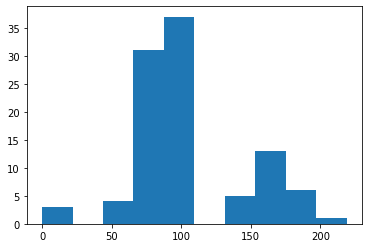

In [36]:
plt.hist(numericDF['OS Total Spent'])

(array([ 2.,  2.,  4., 16., 17., 17., 20., 12.,  6.,  4.]),
 array([109.92 , 125.986, 142.052, 158.118, 174.184, 190.25 , 206.316,
        222.382, 238.448, 254.514, 270.58 ]),
 <BarContainer object of 10 artists>)

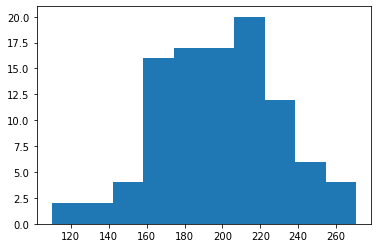

In [37]:
plt.hist(numericDF['CS Total Spent (D)'])

(array([ 4.,  7., 12., 12., 19., 14., 15., 13.,  2.,  2.]),
 array([108.62 , 124.177, 139.734, 155.291, 170.848, 186.405, 201.962,
        217.519, 233.076, 248.633, 264.19 ]),
 <BarContainer object of 10 artists>)

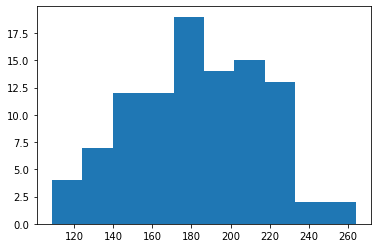

In [38]:
plt.hist(numericDF['A* Total Spent (D)'])

(array([ 4., 12., 11., 20., 14., 12., 13.,  9.,  4.,  1.]),
 array([ 85.22 ,  99.257, 113.294, 127.331, 141.368, 155.405, 169.442,
        183.479, 197.516, 211.553, 225.59 ]),
 <BarContainer object of 10 artists>)

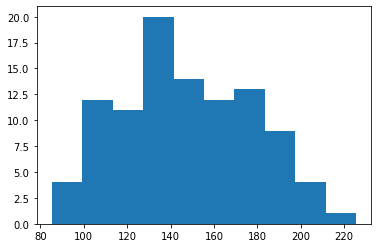

In [39]:
plt.hist(numericDF['FW Total Spent (D)'])

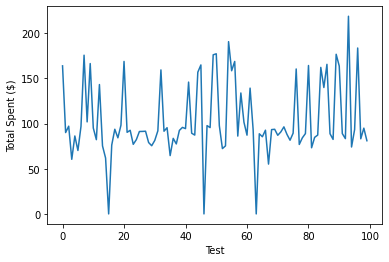

In [40]:
plt.plot(numericDF['OS Total Spent'], label='OS')
plt.xlabel("Test")
plt.ylabel("Total Spent ($)")
plt.show()

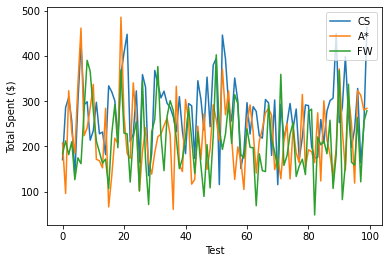

In [41]:
plt.plot(numericDF['CS Total Spent (G)'], label='CS')
plt.plot(numericDF['A* Total Spent (G)'], label='A*')
plt.plot(numericDF['FW Total Spent (G)'], label='FW')
plt.xlabel("Test")
plt.ylabel("Total Spent ($)")
plt.legend()
plt.show()

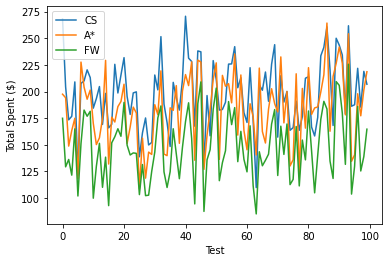

In [42]:
plt.plot(numericDF['CS Total Spent (D)'], label='CS')
plt.plot(numericDF['A* Total Spent (D)'], label='A*')
plt.plot(numericDF['FW Total Spent (D)'], label='FW')
plt.xlabel('Test')
plt.ylabel('Total Spent ($)')
plt.legend()
plt.show()

In [43]:
avgOSTotalSpent = numericDF['OS Total Spent'].mean()

In [44]:
avgCSTotalSpentGreedy = numericDF['CS Total Spent (G)'].mean()
avgASTotalSpentGreedy = numericDF['A* Total Spent (G)'].mean()
avgFWTotalSpentGreedy = numericDF['FW Total Spent (G)'].mean()

In [45]:
avgPercentSavingsOSAndCSGreedy = 100 - ((avgOSTotalSpent / avgCSTotalSpentGreedy) * 100)
avgPercentSavingsOSAndASGreedy = 100 - ((avgOSTotalSpent / avgASTotalSpentGreedy) * 100)
avgPercentSavingsOSAndFWGreedy = 100 - ((avgOSTotalSpent / avgFWTotalSpentGreedy) * 100)

In [46]:
avgDiffOSAndCSGreedy = avgCSTotalSpentGreedy - avgOSTotalSpent
avgDiffOSAndASGreedy = avgASTotalSpentGreedy - avgOSTotalSpent
avgDiffOSAndFWGreedy = avgFWTotalSpentGreedy - avgOSTotalSpent

In [47]:
print('Solution\t avg % > OS \t avg $ > OS')
print('CS (G)\t\t',round(avgPercentSavingsOSAndCSGreedy,2),'\t\t',round(avgDiffOSAndCSGreedy,2))
print('A* (G)\t\t',round(avgPercentSavingsOSAndASGreedy,2),'\t\t',round(avgDiffOSAndASGreedy,2))
print('FW (G)\t\t',round(avgPercentSavingsOSAndFWGreedy,2),'\t\t',round(avgDiffOSAndFWGreedy,2))

Solution	 avg % > OS 	 avg $ > OS
CS (G)		 62.2 		 169.84
A* (G)		 53.54 		 118.95
FW (G)		 51.34 		 108.91


In [48]:
avgCSTotalSpentDynamic = numericDF['CS Total Spent (D)'].mean()
avgASTotalSpentDynamic = numericDF['A* Total Spent (D)'].mean()
avgFWTotalSpentDynamic = numericDF['FW Total Spent (D)'].mean()

In [49]:
avgPercentSavingsOSAndCSDynamic = 100 - ((avgOSTotalSpent / avgCSTotalSpentDynamic) * 100)
avgPercentSavingsOSAndASDynamic = 100 - ((avgOSTotalSpent / avgASTotalSpentDynamic) * 100)
avgPercentSavingsOSAndFWDynamic = 100 - ((avgOSTotalSpent / avgFWTotalSpentDynamic) * 100)

In [50]:
avgDiffOSAndCSDynamic = avgCSTotalSpentDynamic - avgOSTotalSpent
avgDiffOSAndASDynamic = avgASTotalSpentDynamic - avgOSTotalSpent
avgDiffOSAndFWDynamic = avgFWTotalSpentDynamic - avgOSTotalSpent

In [51]:
print('Solution\t avg % > FW (D)\t avg $ > FW (D)')
print('CS (D)\t\t',round(avgPercentSavingsOSAndCSDynamic,2),'\t\t',round(avgDiffOSAndCSDynamic,2))
print('A* (D)\t\t',round(avgPercentSavingsOSAndASDynamic,2),'\t\t',round(avgDiffOSAndASDynamic,2))
print('A* (D)\t\t',round(avgPercentSavingsOSAndFWDynamic,2),'\t\t',round(avgDiffOSAndFWDynamic,2))

Solution	 avg % > FW (D)	 avg $ > FW (D)
CS (D)		 47.96 		 95.15
A* (D)		 43.67 		 80.02
A* (D)		 29.98 		 44.21


<h3>Compare the accuracy of the two refueling solutions</h3>

In [52]:
avgTotalSpentGreedy = (avgFWTotalSpentGreedy + avgCSTotalSpentGreedy + avgASTotalSpentGreedy) / 3
avgTotalSpentDynamic = (avgFWTotalSpentDynamic + avgCSTotalSpentDynamic + avgASTotalSpentDynamic) / 3

In [53]:
avgDiffGreedyAndDynamic = avgTotalSpentGreedy - avgTotalSpentDynamic
avgPercentSavingsDynamic = 100 - (avgTotalSpentDynamic / avgTotalSpentGreedy) * 100

In [54]:
print('Dynamic refueling is, on average,',round(avgPercentSavingsDynamic,2),'% ($',round(avgDiffGreedyAndDynamic,2),') less expensive than greedy solution.')

Dynamic refueling is, on average, 25.21 % ($ 59.44 ) less expensive than greedy solution.


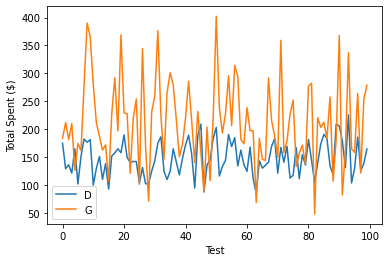

In [55]:
plt.plot(numericDF['FW Total Spent (D)'], label='D')
plt.plot(numericDF['FW Total Spent (G)'], label='G')
plt.xlabel('Test')
plt.ylabel('Total Spent ($)')
plt.legend()
plt.show()

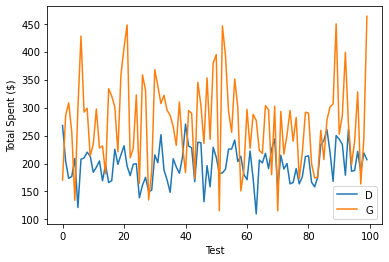

In [56]:
plt.plot(numericDF['CS Total Spent (D)'], label='D')
plt.plot(numericDF['CS Total Spent (G)'], label='G')
plt.xlabel('Test')
plt.ylabel('Total Spent ($)')
plt.legend()
plt.show()

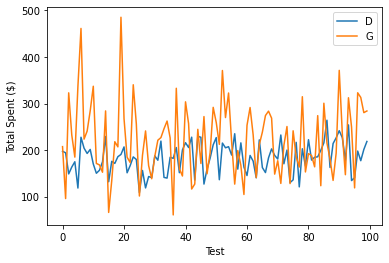

In [57]:
plt.plot(numericDF['A* Total Spent (D)'], label='D')
plt.plot(numericDF['A* Total Spent (G)'], label='G')
plt.xlabel('Test')
plt.ylabel('Total Spent ($)')
plt.legend()
plt.show()

<h2>Compare efficiency of three solutions for example open route</h2>

In [58]:
Stations = generateRandomOpenRouteGraph()
routeAdjacencyMatrix = getAdjacencyMatrix(Stations)

In [59]:
%time pathChoosingNextCheapestStation = getPathChoosingNextCheapestStation(Stations, routeAdjacencyMatrix)

CPU times: total: 0 ns
Wall time: 0 ns


In [60]:
%time findRefuelingPolicy(Stations, pathChoosingNextCheapestStation)

CPU times: total: 0 ns
Wall time: 0 ns


218.93

In [61]:
%time findRefuelingPolicyDynamically(Stations, pathChoosingNextCheapestStation)

CPU times: total: 0 ns
Wall time: 6.79 ms


249.64

In [62]:
%time pathUsingAStar = getPathUsingAStar(Stations, routeAdjacencyMatrix)

CPU times: total: 0 ns
Wall time: 6.61 ms


In [63]:
%time findRefuelingPolicy(Stations, pathUsingAStar)

CPU times: total: 0 ns
Wall time: 0 ns


158.91

In [64]:
%time findRefuelingPolicyDynamically(Stations, pathUsingAStar)

CPU times: total: 15.6 ms
Wall time: 45.5 ms


199.1

In [65]:
%time pathUsingFloydWarshall = getPathUsingFloydWarshall(routeAdjacencyMatrix)

CPU times: total: 0 ns
Wall time: 8.57 ms


In [66]:
%time findRefuelingPolicy(Stations, pathUsingFloydWarshall)

CPU times: total: 0 ns
Wall time: 4.59 ms


224.9

In [67]:
%time findRefuelingPolicyDynamically(Stations, pathUsingFloydWarshall)

CPU times: total: 31.2 ms
Wall time: 204 ms


156.27

In [68]:
pathUsingOptimalSolution = [start]
%time findOptimalRefuelingPolicy(Stations, routeAdjacencyMatrix, pathUsingOptimalSolution)

CPU times: total: 15.6 ms
Wall time: 3.43 ms


75.96